In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix 
import seaborn as sns

In [2]:
train_path="C:/Users/91878/Documents/22CE103/ML/myenv/archive/Fruits Classification/train"
test_path="C:/Users/91878/Documents/22CE103/ML/myenv/archive/Fruits Classification/test"
valid_path="C:/Users/91878/Documents/22CE103/ML/myenv/archive/Fruits Classification/valid"

In [3]:
batch_size = 32
img_height = 180
img_width = 180

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9700 files belonging to 5 classes.
Using 7760 files for training.


In [5]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 100 files belonging to 5 classes.
Using 80 files for training.


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  valid_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 200 files belonging to 5 classes.
Using 40 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['Apple', 'Banana', 'Grape', 'Mango', 'Strawberry']


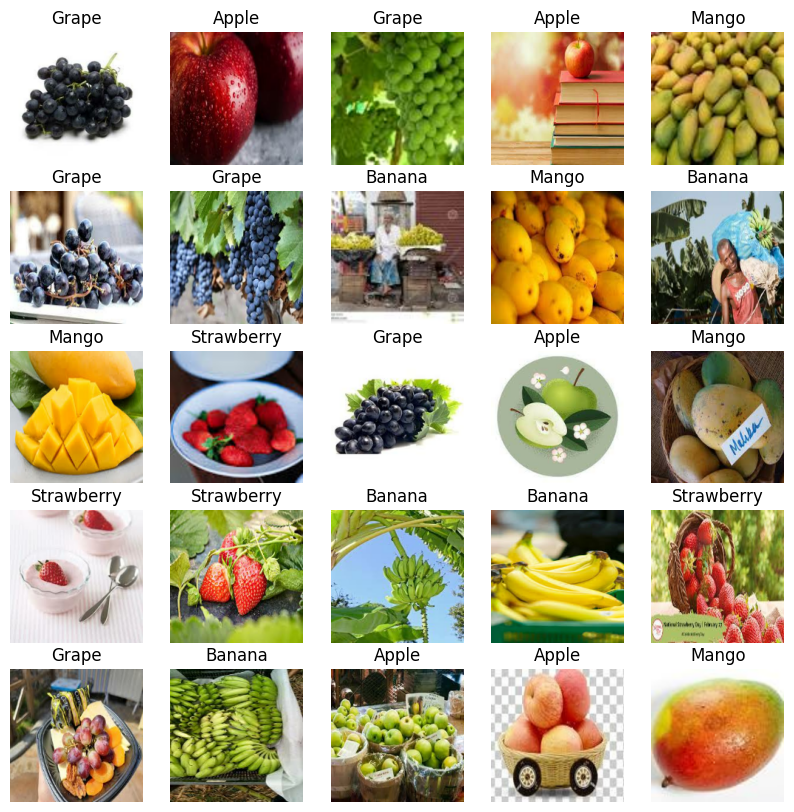

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [9]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [10]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [11]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [12]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
num_classes = 5

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [14]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [15]:
model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=20 
)

Epoch 1/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 42s 166ms/step - accuracy: 0.3853 - loss: 1.3919 - val_accuracy: 0.5750 - val_loss: 0.9780
Epoch 2/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 39s 161ms/step - accuracy: 0.5792 - loss: 1.0337 - val_accuracy: 0.6500 - val_loss: 0.8768
Epoch 3/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 39s 159ms/step - accuracy: 0.6365 - loss: 0.9175 - val_accuracy: 0.7125 - val_loss: 0.8512
Epoch 4/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 38s 154ms/step - accuracy: 0.6959 - loss: 0.7884 - val_accuracy: 0.7250 - val_loss: 0.8536
Epoch 5/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 39s 162ms/step - accuracy: 0.7617 - loss: 0.6279 - val_accuracy: 0.7250 - val_loss: 1.0713
Epoch 6/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 38s 157ms/step - accuracy: 0.8167 - loss: 0.4898 - val_accuracy: 0.6000 - val_loss: 1.6698
Epoch 7/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 31s 127ms/step - accuracy: 0.8451 - loss: 0.4148 - val_accuracy: 0.6125 - val_loss: 1.5440
Epoch 8/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 23s 96ms/step - accuracy: 0.8870 - loss: 0.